## Bank Marketing
### Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

#### Attribute Information:
* Bank client data:
* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign:
* Contact: contact communication type (categorical: 'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


#### Other attributes:
* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* Social and economic context attributes
* Emp.var.rate: employment variation rate - quarterly indicator (numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: 'yes', 'no')
#### Source:

### Output variable (desired target):
#### y - has the client subscribed a term deposit? (binary: 'yes', 'no')
##### Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [992]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [993]:
pd.set_option('display.max_columns', 999)

In [994]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')


In [995]:
bank .head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [996]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [997]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [998]:
bank[0:].transpose()

0            1            2            3      \
age                      56           57           37           40   
job               housemaid     services     services       admin.   
marital             married      married      married      married   
education          basic.4y  high.school  high.school     basic.6y   
default                  no      unknown           no           no   
housing                  no           no          yes           no   
loan                     no           no           no           no   
contact           telephone    telephone    telephone    telephone   
month                   may          may          may          may   
day_of_week             mon          mon          mon          mon   
duration                261          149          226          151   
campaign                  1            1            1            1   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.1          1.1          1.1          1.1   
cons.price.idx       93.994       93.994       93.994       93.994   
cons.conf.idx         -36.4        -36.4        -36.4        -36.4   
euribor3m             4.857        4.857        4.857        4.857   
nr.employed            5191         5191         5191         5191   
y                        no           no           no           no   

                      4            5                    6            7      \
age                      56           45                   59           41   
job                services     services               admin.  blue-collar   
marital             married      married              married      married   
education       high.school     basic.9y  professional.course      unknown   
default                  no      unknown                   no      unknown   
housing                  no           no                   no           no   
loan                    yes           no                   no           no   
contact           telephone    telephone            telephone    telephone   
month                   may          may                  may          may   
day_of_week             mon          mon                  mon          mon   
duration                307          198                  139          217   
campaign                  1            1                    1            1   
pdays                   999          999                  999          999   
previous                  0            0                    0            0   
poutcome        nonexistent  nonexistent          nonexistent  nonexistent   
emp.var.rate            1.1          1.1                  1.1          1.1   
cons.price.idx       93.994       93.994               93.994       93.994   
cons.conf.idx         -36.4        -36.4                -36.4        -36.4   
euribor3m             4.857        4.857                4.857        4.857   
nr.employed            5191         5191                 5191         5191   
y                        no           no                   no           no   

                              8            9            10           11     \
age                              24           25           41           25   
job                      technician     services  blue-collar     services   
marital                      single       single      married       single   
education       professional.course  high.school      unknown  high.school   
default                          no           no      unknown           no   
housing                         yes          yes           no          yes   
loan                             no           no           no           no   
contact                   telephone    telephone    telephone    telephone   
month                           may          may          may 

In [999]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()
# bank.isnull().any() # one way to search for null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [1000]:
import seaborn as sns

### 1. Bank client data Analysis and Categorical Treatment¶
##### Work with the atributes related to bank clients
#### To make things more clear, i'm going to create a new datasets that contains just this part of data

In [1001]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [1002]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [1003]:
# knowing the categorical variables
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [1004]:
# knowing the categorical variables
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [1005]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


### Age
* Trying to find some insights crossing those variables

In [1006]:
# Trying to find some strange values or null values
print('Max age: ', bank_client['age'].max())
print('Min age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Max age:  98
Min age:  17
Null Values:  False


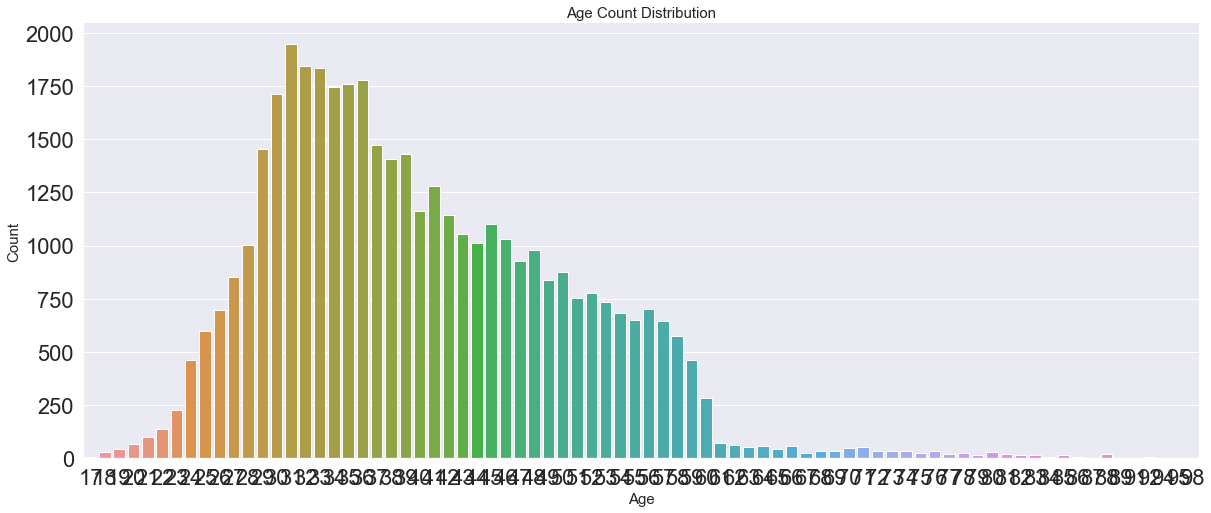

In [1007]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

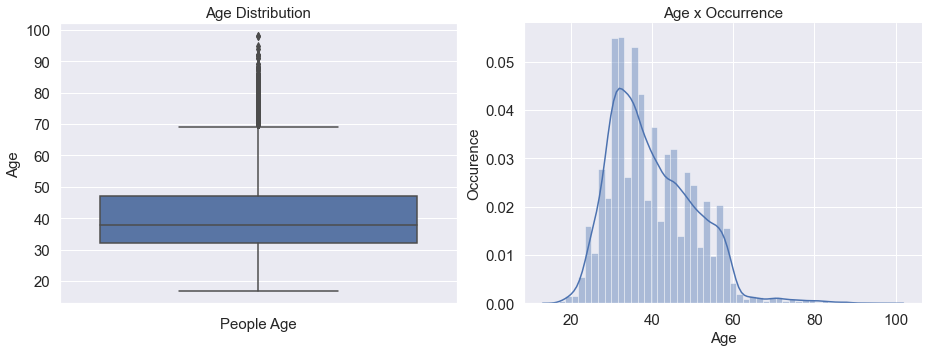

In [1008]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [1009]:
# Quartiles
print('1st Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2nd Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3rd Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4th Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')


1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
Ages above:  69.5 are outliers


In [1010]:
print('Number of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Number of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [1011]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight about dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')


MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age has a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscribe a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

### Jobs

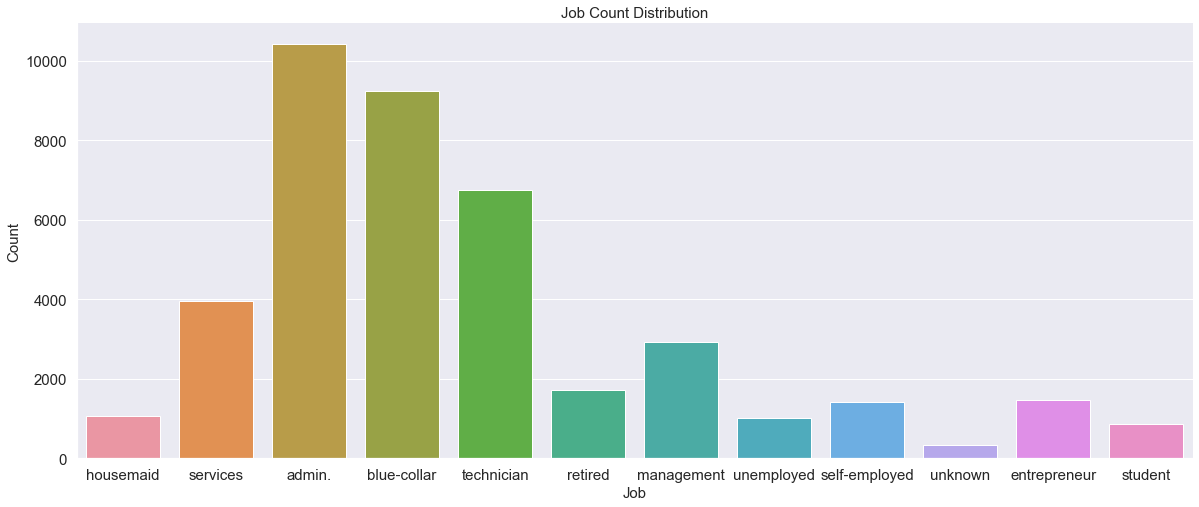

In [1012]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


### Marital

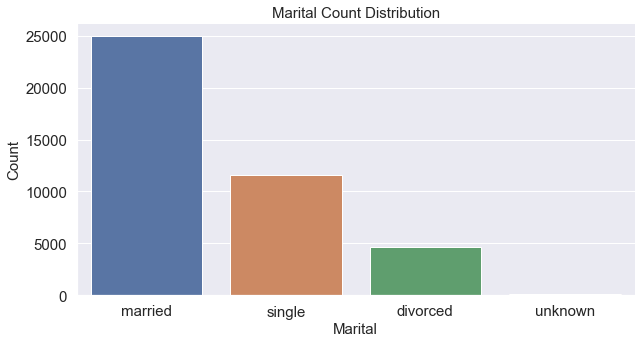

In [1013]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Education

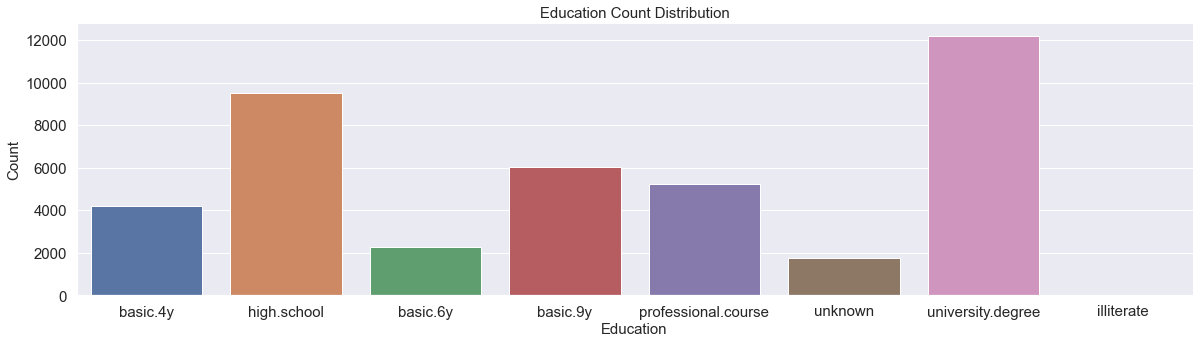

In [1014]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Default Housing Loan

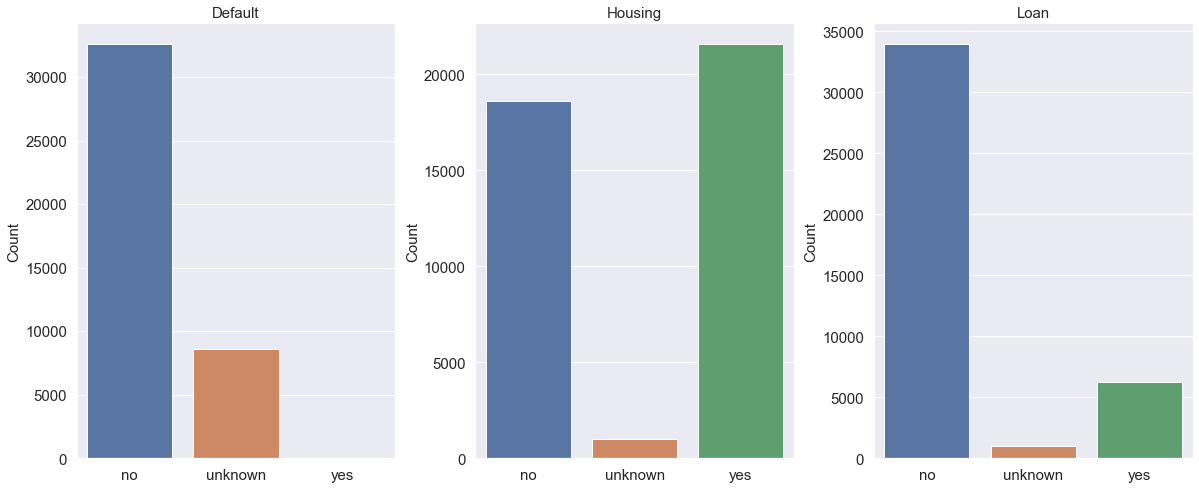

In [1015]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)


In [1016]:
bank_client = bank.iloc[: , 0:7]


In [1017]:
bank_client['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [1018]:
print('housing:\n No housing in default:'     , bank_client[bank_client['housing'] == 'no']     ['housing'].count(),
              '\n Unknown housing in default:', bank_client[bank_client['housing'] == 'unknown']['housing'].count(),
              '\n Yes to housing in default:' , bank_client[bank_client['housing'] == 'yes']    ['housing'].count())

housing:
 No housing in default: 18622 
 Unknown housing in default: 990 
 Yes to housing in default: 21576


In [1019]:
# This is good when we want to drop unknown from only one column
#bank_client = bank_client[bank_client['housing']!='unknown']

#### Dropped all unknown value from housing,default,loan and marital columns.

In [1020]:
unknown_col_list=['housing','default','loan','marital']

In [1021]:
 for column in unknown_col_list: 
    bank_client=bank_client[bank_client[column]!='unknown']

In [1022]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
6,59,admin.,married,professional.course,no,no,no


In [1023]:
bank_client['default'].unique()

array(['no', 'yes'], dtype=object)

In [1024]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['default'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['default'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['default'].count())

Default:
 No credit in default: 31757 
 Unknown credit in default: 0 
 Yes to credit in default: 3


In [1025]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['housing'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['housing'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['housing'].count())

Housing:
 No housing in loan: 14580 
 Unknown housing in loan: 0 
 Yes to housing in loan: 17180


In [1026]:
print('Loan:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['loan'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['loan'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['loan'].count())

Loan:
 No to personal loan: 26794 
 Unknown to personal loan: 0 
 Yes to personal loan: 4966


#### BANK CLIENTS CONCLUSION

The age variable has a medium dispersion and is not related with other variables.si it is not giving much insight.

Jobs, Marital and Education,
i think the best analysis is just the count of each variable to check the distribution. If we relate with the other variables, it's inconclusive. All these variables have yes, unknown and no .



###  Bank Client Categorical Treatment
Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be applied later

In [1027]:
bank_client = pd.get_dummies(data = bank_client, prefix = ['job'] , columns = ['job'] , drop_first = True)


In [1028]:
bank_client = pd.get_dummies(data = bank_client, prefix = ['marital'] , columns = ['marital'] , drop_first = True)

In [1029]:
bank_client = pd.get_dummies(data = bank_client, prefix = ['default'] , columns = ['default'] , drop_first = True)

In [1030]:
bank_client = pd.get_dummies(data = bank_client, prefix = ['housing'] , columns = ['housing'] , drop_first = True)

In [1031]:
bank_client = pd.get_dummies(data = bank_client, prefix = ['loan'] , columns = ['loan'] , drop_first = True)

In [1032]:
bank_client.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,56,basic.4y,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,37,high.school,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,40,basic.6y,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,56,high.school,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
6,59,professional.course,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1033]:
bank_client.columns

Index(['age', 'education', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes'],
      dtype='object')

In [1034]:
# Label encoder order is alphabetical
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
#bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
#bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
#bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
#bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
#bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [1035]:
#age_bucket=bank_client.groupby(pd.cut(bank_client['age'],bins=[0,20,30,40,50,60,70,80,90]))

In [1036]:
#print(age_bucket)

In [1037]:
#bank_client.insert(2,"Agegroup",age_bucket)

In [1038]:
   def age(data):
     data.loc[data['age'] <= 20, 'age'] = 1
     data.loc[(data['age'] > 20) & (data['age'] <= 25)  , 'age']    = 2
     data.loc[(data['age'] > 25) & (data['age'] <= 30)  , 'age']   = 3
     data.loc[(data['age'] > 30) & (data['age'] <= 35) , 'age'] = 4
     data.loc[(data['age'] > 35) & (data['age'] <= 40), 'age'] = 5
     data.loc[(data['age'] > 40) & (data['age'] <= 45), 'age'] = 6 
     data.loc[(data['age'] > 45) & (data['age'] <= 50), 'age'] = 7
     data.loc[(data['age'] > 50) & (data['age'] <= 55), 'age'] = 8
     data.loc[(data['age'] > 55) & (data['age'] <= 60)  , 'age']    = 9
     data.loc[(data['age'] > 60) & (data['age'] <= 65)  , 'age']    = 10
     data.loc[(data['age'] > 65) & (data['age'] <= 70)  , 'age']    = 11
     data.loc[(data['age'] > 70) & (data['age'] <= 75)  , 'age']    = 12
     data.loc[(data['age'] > 75) & (data['age'] <= 80)  , 'age']    = 13
     data.loc[(data['age'] > 80) & (data['age'] <= 85)  , 'age']    = 14
     data.loc[(data['age'] > 85) & (data['age'] <= 90)  , 'age']    = 15
     data.loc[data['age']  > 90, 'age'] = 16
     return data
age(bank_client);

In [1039]:
bank_client['age'].unique()

array([ 9,  5,  2,  3,  4,  7,  8,  6,  1, 11, 10, 13, 12, 15, 16, 14])

In [1040]:
bank_client['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'unknown', 'illiterate'],
      dtype=object)

In [1041]:
bank_client['education_unknown']=bank_client['education'].apply(lambda x: 1 if x=='unknown' else 0)

In [1042]:
bank_client['education'].value_counts()

university.degree      10450
high.school             7705
professional.course     4329
basic.9y                4298
basic.4y                2409
basic.6y                1402
unknown                 1156
illiterate                11
Name: education, dtype: int64

In [1043]:
def education(data):
 data.loc[(data['education'] == 'basic.4y') , 'education'] = 1
 data.loc[(data['education'] == 'basic.6y') , 'education'] = 2
 data.loc[(data['education'] == 'basic.9y') , 'education'] = 3
 data.loc[(data['education'] == 'high.school') , 'education'] = 4
 data.loc[(data['education'] == 'professional.course') , 'education'] = 5
 data.loc[(data['education'] == 'university.degree') , 'education'] = 6
 data = data[~data.education.isin(['unknown','illiterate'])]
 return data
education(bank_client);

In [1044]:
bank_client=bank_client[bank_client['education']!='unknown']

In [1045]:
bank_client=bank_client[bank_client['education']!='illiterate']

In [1046]:
bank_client['education'].unique()

array([1, 4, 2, 5, 3, 6], dtype=object)

In [1047]:
bank_client.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,education_unknown
0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5,4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,5,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,9,4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
6,9,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1048]:
# Manualy way to convert Categorical in Continuous
#bank_client['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

#bank_client['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

#bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

#bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

#bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

#bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)



In [1049]:
# bank_client.drop(['age'],axis=1)


### 2. Related with the last contact of the current campaign¶
#### Treat categorical, see those values, group continuous variables if necessary

In [1050]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [1051]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [1052]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich month of year this campaign work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaign work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which month of year this campaign work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaign work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


### Duration

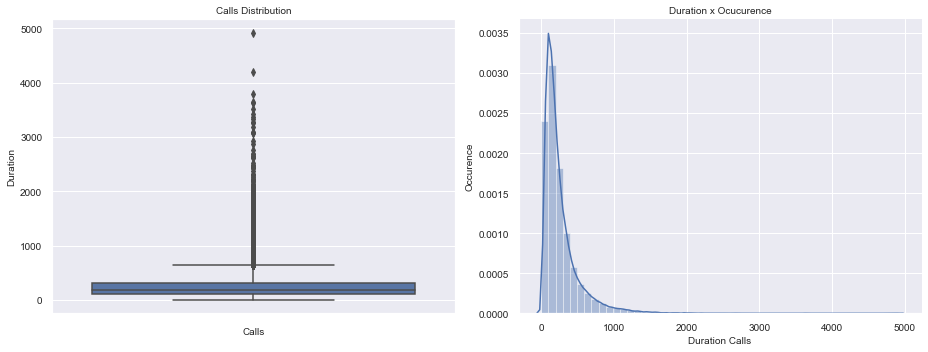

In [1053]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [1054]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


#### This means there are many outliers in duration time becuase range is very high. Max duration is far away from the mean.

### Feature engineering with call duration  column whether call duration column is relevant in making  customers decision about buying cd.

In [1055]:
#percentages = []
#for duration in list(bank_related["duration"].unique()):
    
  #  p = round((bank_related["Y"][bank_related["duration"]==duration].value_counts()[1]/bank_related["Y"][bank_related["duration"]==duration].value_counts().sum())*100 , 2)
    
    #percentages.append(p)
   # print(duration,"(% to Y) : ", p)

In [1056]:
print('Number of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Number of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [1057]:
print('Duration above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  644.5 are outliers


In [1058]:
bank_related[bank_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

In [1059]:
#person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


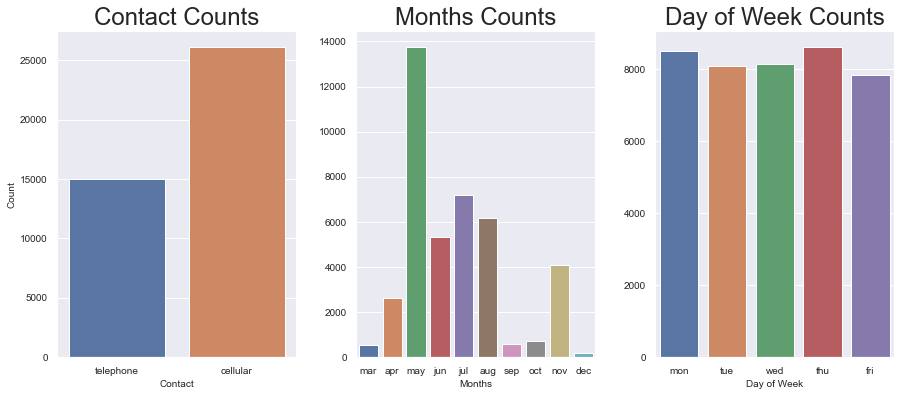

In [1060]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

#### From these plot, we can assume that contact method and contact month might have some effect on prediction. So we should investigate them further. It lloks like days of week does not have signification effect.

### Contact, Month, Day of Week treatment

In [1061]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [1062]:
# bank_related['contact'].replace(['cellular', 'telephone'], [0,1], inplace=True)

In [1063]:
bank_related = pd.get_dummies(data = bank_related, columns = ['contact'] , prefix = ['contact'],drop_first=True)

In [1064]:
bank_related.head()

,month,day_of_week,duration,contact_telephone
0,may,mon,261,1
1,may,mon,149,1
2,may,mon,226,1
3,may,mon,151,1
4,may,mon,307,1


In [1065]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
 
bank_related['month']  = labelencoder_X.fit_transform(bank_related['month']) 


In [1066]:
bank_related['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [1067]:
days = {'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,'sat':5,'sun':6}

bank_related['day_of_week'] = bank_related['day_of_week'].apply(lambda x: days[x])

#### A way to Converting Categorical variables using dummies if you judge necessary

In [1068]:
# bank_related = pd.get_dummies(data = bank_related, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

#bank_related = pd.get_dummies(data = bank_related, prefix = ['month'] , columns = ['month'] , drop_first = True)

#bank_related = pd.get_dummies(data = bank_related, prefix = ['day_of_week'], columns = ['day_of_week'], drop_first = True)

In [1069]:
bank_related.head()

,month,day_of_week,duration,contact_telephone
0,6,0,261,1
1,6,0,149,1
2,6,0,226,1
3,6,0,151,1
4,6,0,307,1


In [1070]:
bank_related[0:].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,40689,40690,40691,40692,40693,40694,40695,40696,40697,40698,40699,40700,40701,40702,40703,40704,40705,40706,40707,40708,40709,40710,40711,40712,40713,40714,40715,40716,40717,40718,40719,40720,40721,40722,40723,40724,40725,40726,40727,40728,40729,40730,40731,40732,40733,40734,40735,40736,40737,40738,40739,40740,40741,40742,40743,40744,40745,40746,40747,40748,40749,40750,40751,40752,40753,40754,40755,40756,40757,40758,40759,40760,40761,40762,40763,40764,40765,40766,40767,40768,40769,40770,40771,40772,40773,40774,40775,40776,40777,40778,40779,40780,40781,40782,40783,40784,40785,40786,40787,40788,40789,40790,40791,40792,40793,40794,40795,40796,40797,40798,40799,40800,40801,40802,40803,40804,40805,40806,40807,40808,40809,40810,40811,40812,40813,40814,40815,40816,40817,40818,40819,40820,40821,40822,40823,40824,40825,40826,40827,40828,40829,40830,40831,40832,40833,40834,40835,40836,40837,40838,40839,40840,40841,40842,40843,40844,40845,40846,40847,40848,40849,40850,40851,40852,40853,40854,40855,40856,40857,40858,40859,40860,40861,40862,40863,40864,40865,40866,40867,40868,40869,40870,40871,40872,40873,40874,40875,40876,40877,40878,40879,40880,40881,40882,40883,40884,40885,40886,40887,40888,40889,40890,40891,40892,40893,40894,40895,40896,40897,40898,40899,40900,40901,40902,40903,40904,40905,40906,40907,40908,40909,40910,40911,40912,40913,40914,40915,40916,40917,40918,40919,40920,40921,40922,40923,40924,40925,40926,40927,40928,40929,40930,40931,40932,40933,40934,40935,40936,40937,40938,40939,40940,40941,40942,40943,40944,40945,40946,40947,40948,40949,40950,40951,40952,40953,40954,40955,40956,40957,40958,40959,40960,40961,40962,40963,40964,40965,40966,40967,40968,40969,40970,40971,40972,40973,40974,40975,40976,40977,40978,40979,40980,40981,40982,40983,40984,40985,40986,40987,40988,40989,40990,40991,40992,40993,40994,40995,40996,40997,40998,40999,41000,41001,41002,41003,41004,41005,41006,41007,41008,41009,41010,41011,41012,41013,41014,41015,41016,41017,41018,41019,41020,41021,41022,41023,41024,41025,41026,41027,41028,41029,41030,41031,41032,41033,41034,41035,41036,41037,41038,41039,410

In [1071]:
# Quartiles
print('1st Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2nd Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3rd Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4th Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1st Quartile:  102.0
2nd Quartile:  180.0
3rd Quartile:  319.0
4th Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [1072]:
def duration(data):
 data.loc[data['duration'] <= 102, 'duration'] = 1
 data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
 data.loc[(data['duration'] > 180) & (data['duration'] <= 319) , 'duration'] = 3 
 data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
 data.loc[data['duration']  > 644.5, 'duration'] == 5
 return data
duration(bank_related);

In [1073]:
bank_related.head()

,month,day_of_week,duration,contact_telephone
0,6,0,3,1
1,6,0,2,1
2,6,0,3,1
3,6,0,2,1
4,6,0,3,1


In [1074]:
bank_related.isna()

,month,day_of_week,duration,contact_telephone
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
41183,False,False,False,False
41184,False,False,False,False
41185,False,False,False,False
41186,False,False,False,False


In [1075]:
del bank_related['duration']

### Social and economic context attributes

In [1076]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [1077]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [1078]:
bank.drop(columns =['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


### Other attributes
* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [1079]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [1080]:
bank_o['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [1081]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [1082]:
print('Poutcome:\n Success to poutcome:'     , bank_o[bank_o['poutcome'] == 'success']     ['poutcome'].count(),
              '\n Failure to poutcome:', bank_o[bank_o['poutcome'] == 'failure']['poutcome'].count(),
              '\n Nonexistent to poutcome:'    , bank_o[bank_o['poutcome'] == 'nonexistent']    ['poutcome'].count())

Poutcome:
 Success to poutcome: 1373 
 Failure to poutcome: 4252 
 Nonexistent to poutcome: 35563


In [1083]:
bank_o['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [1084]:
bank_o['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [1085]:
#print("Max number of contacts:  ") .max()
#print("Min number of contacts:   ") .min()
#print("Mean number of contacts:   ") .mean()
#print("STD number of contacts:   ").std()
# Std close to the mean means that the data values are close to the mean 

In [1086]:
to_drop=['pdays','poutcome','previous']

In [1087]:
bank_o.drop(to_drop,inplace=True,axis=1)

In [1088]:
 bank_o = pd.get_dummies(data = bank_o, columns = ['campaign'] , prefix = ['campaign'],drop_first=True)

In [1096]:
bank_o.head()

,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10,campaign_11,campaign_12,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1097]:
bank_final= pd.concat([bank_client, bank_related, bank_o,bank['y']], axis = 1)

In [1098]:
bank_final.dropna()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,education_unknown,month,day_of_week,contact_telephone,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,...,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,y
0,9.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
2,5.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
3,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
4,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
6,9.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,12.0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yes
41184,7.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
41185,9.0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
41186,6.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yes


In [1099]:
bank_final.columns

Index(['age', 'education', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'education_unknown', 'month', 'day_of_week',
       'contact_telephone', 'campaign_2', 'campaign_3', 'campaign_4',
       'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8', 'campaign_9',
       'campaign_10', 'campaign_11', 'campaign_12', 'campaign_13',
       'campaign_14', 'campaign_15', 'campaign_16', 'campaign_17',
       'campaign_18', 'campaign_19', 'campaign_20', 'campaign_21',
       'campaign_22', 'campaign_23', 'campaign_24', 'campaign_25',
       'campaign_26', 'campaign_27', 'campaign_28', 'campaign_29',
       'campaign_30', 'campaign_31', 'campaign_32', 'campaign_33',
       'campaign_34', 'campaign_35', 'campaign_37', 'campaign_39',
       'campa

In [983]:
bank_final.describe()


,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,education_unknown,month,day_of_week,contact_telephone,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign_2,campaign_3,campaign_4,campaign_5,...,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56
count,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.000000,30593.00000,30593.000000,30593.0,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,5.209623,0.185369,0.035531,0.022554,0.075540,0.039682,0.035596,0.093387,0.019939,0.178897,0.024123,0.003792,0.573857,0.309940,0.000098,0.54166,0.156703,0.0,4.230868,1.979581,0.365252,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.256628,0.129674,0.064363,0.038822,...,0.002234,0.001675,0.001238,0.001238,0.001408,0.000801,0.000631,0.000728,0.000583,0.000413,0.000388,0.000364,0.000194,0.000194,0.000267,0.000194,0.000243,0.000170,0.000170,0.000097,0.000097,0.000073,0.000121,0.000024,0.000024,0.000049,0.000024,0.000049,0.000049,0.000024
std,2.089169,0.388603,0.185121,0.148480,0.264265,0.195215,0.185285,0.290979,0.139794,0.383272,0.153434,0.061461,0.494523,0.462476,0.009902,0.49827,0.363526,0.0,2.320025,1.411514,0.481507,1.570960,0.578840,4.628198,1.734447,72.251528,0.436778,0.335948,0.245402,0.193173,...,0.047209,0.040896,0.035167,0.035167,0.037500,0.028295,0.025117,0.026979,0.024132,0.020312,0.019706,0.019080,0.013936,0.013936,0.016340,0.013936,0.015580,0.013036,0.013036,0.009854,0.009854,0.008534,0.011017,0.004927,0.004927,0.006968,0.004927,0.006968,0.006968,0.004927
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,3.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.0,4.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,0.000000,0.00000

In [1108]:
bank_final.dropna()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,education_unknown,month,day_of_week,contact_telephone,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,...,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,y
0,9.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
2,5.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
3,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
4,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
6,9.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,12.0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yes
41184,7.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
41185,9.0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no
41186,6.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yes


In [1109]:
#bank.columns

In [1110]:
#y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [1111]:
#bank_final=pd.concat([bank_final,y])

In [1112]:
bank_final.shape

(41188, 64)

In [1113]:
bank_final.to_csv('clean_data.csv',index=False)